In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [114]:
os.chdir('/home/hermannm/projects/DDoS_Lab')

## Data preparation

In [115]:
df1 = pd.read_csv('SCLDDoS2024_SetA_components.csv')
column_names = df1.columns.tolist()
df2 = pd.read_csv('SCLDDoS2024_SetB_components.csv', header=None, names = column_names)

In [116]:
df_comp = pd.concat([df1, df2], ignore_index=True)

In [117]:
df_comp = df_comp.drop(columns=['Card', 'Significant flag'])

In [118]:
df3 = pd.read_csv('SCLDDoS2024_SetA_events.csv')
column_names2 = df3.columns.tolist()
df4 = pd.read_csv('SCLDDoS2024_SetB_events.csv', header=None, names = column_names2)

In [119]:
df_events = pd.concat([df3, df4], ignore_index = True)

In [120]:
df_events = df_events.drop(columns=['Card', 'Whitelist flag', 'Significant flag'])


In [121]:
attack_type_map = df_events.set_index('Attack ID')['Type'].to_dict()

In [122]:
attack_type_map.get(702941)

'Normal traffic'

In [123]:
df_comp = df_comp.merge(df_events[['Attack ID', 'Type']], on='Attack ID', how='left')

In [124]:
df_comp

,Attack ID,Detect count,Victim IP,Port number,Attack code,Packet speed,Data speed,Avg packet len,Source IP count,Time,Type
0,1,1,IP_0001,4500,High volume traffic,55600,73,1383,6,2022-08-08T18:09:36,Normal traffic
1,2,1,IP_0002,4500,High volume traffic,63500,90,1506,1,2022-08-08T18:37:28,Normal traffic
2,3,1,IP_0003,1200,High volume traffic,59700,79,1399,1,2022-08-08T18:41:25,Normal traffic
3,3,2,IP_0003,1200,High volume traffic,65700,86,1399,1,2022-08-08T18:41:26,Normal traffic
4,4,1,IP_0002,4500,High volume traffic,59500,85,1486,1,2022-08-08T18:47:49,Normal traffic
...,...,...,...,...,...,...,...,...,...,...,...
1820087,702939,1,IP_67140,0,High volume traffic,63700,91,1498,1,2023-08-25T18:04:21,Normal traffic
1820088,702940,1,IP_67500,443,High volume traffic,59200,33,594,1,2023-08-25T18:04:42,Normal traffic
1820089,702940,2,IP_67500,443,High volume traffic,60500,34,594,1,2023-08-25T18:05:16,Normal traffic
1820090,702940,3,IP_67500,0,High volume traffic,55200,31,594,1,2023-08-25T18:05:45,Normal traffic


/tmp/ipykernel_21029/2424792974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


Text(0.5, 1.0, 'Occurrences of Each Attack Type')

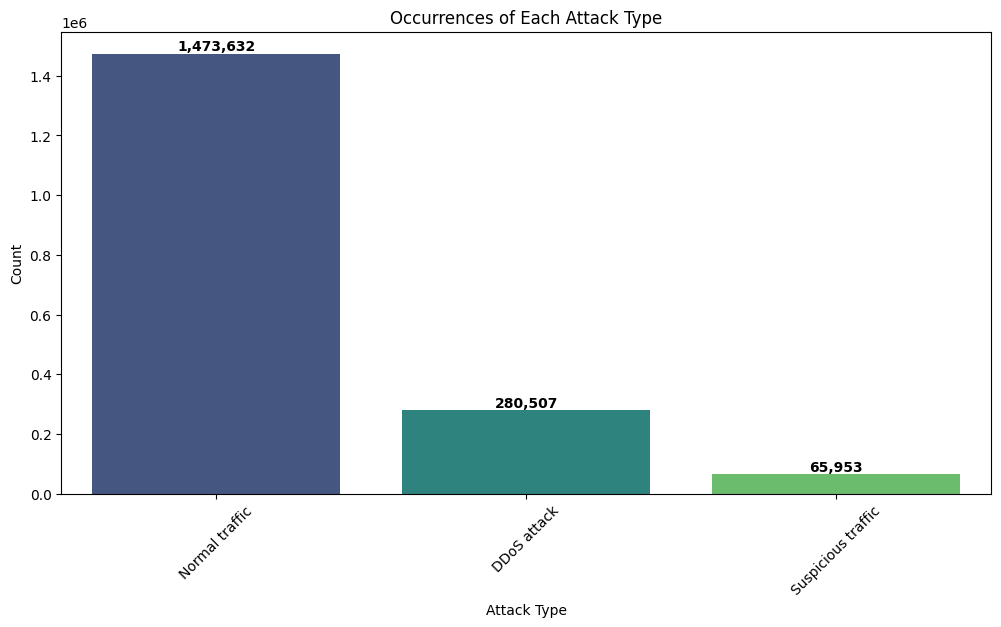

In [125]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_comp, 
    x='Type', 
    order=df_comp['Type'].value_counts().index, 
    palette='viridis'
)

# Add count annotations on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height()):,}',  # Format with thousands separator
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
    )

plt.xticks(rotation=45)  # Rotate labels for readability
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Occurrences of Each Attack Type")


/tmp/ipykernel_21029/960315309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


Text(0.5, 1.0, 'Occurrences of Each Attack Type')

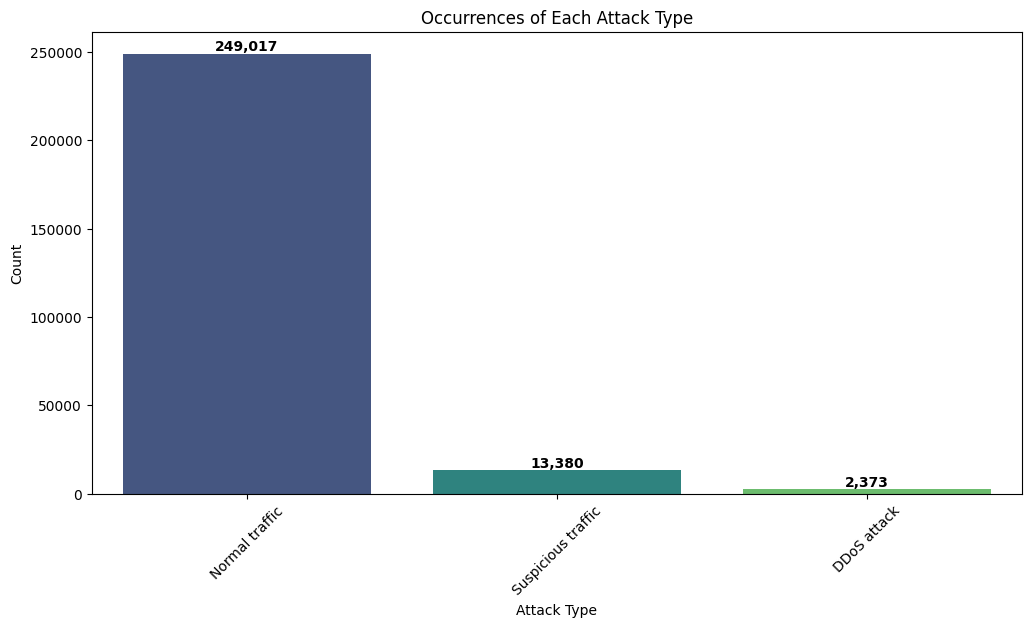

In [126]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_events, 
    x='Type', 
    order=df_events['Type'].value_counts().index, 
    palette='viridis'
)

# Add count annotations on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height()):,}',  # Format with thousands separator
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
    )

plt.xticks(rotation=45)  # Rotate labels for readability
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Occurrences of Each Attack Type")

In [127]:
# Count occurrences of each type in both datasets
events_count = df_events['Type'].value_counts()
comp_count = df_comp['Type'].value_counts()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Events Count': events_count, 'Comp Count': comp_count})

# Fill missing values with 0 (some types may not exist in both DataFrames)
comparison_df = comparison_df.fillna(0)

# Calculate the ratio (how many attack packages correspond to each event)
comparison_df['Ratio'] = (comparison_df['Comp Count'] / comparison_df['Events Count']).round()
comparison_df = comparison_df.sort_values(by='Ratio', ascending=False)  # Sort by ratio

In [128]:
comparison_df

,Events Count,Comp Count,Ratio
Type,,,
DDoS attack,2373,280507,118.0
Normal traffic,249017,1473632,6.0
Suspicious traffic,13380,65953,5.0


/tmp/ipykernel_21029/2966266144.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=comparison_df, x=comparison_df.index, y='Ratio', palette='coolwarm')


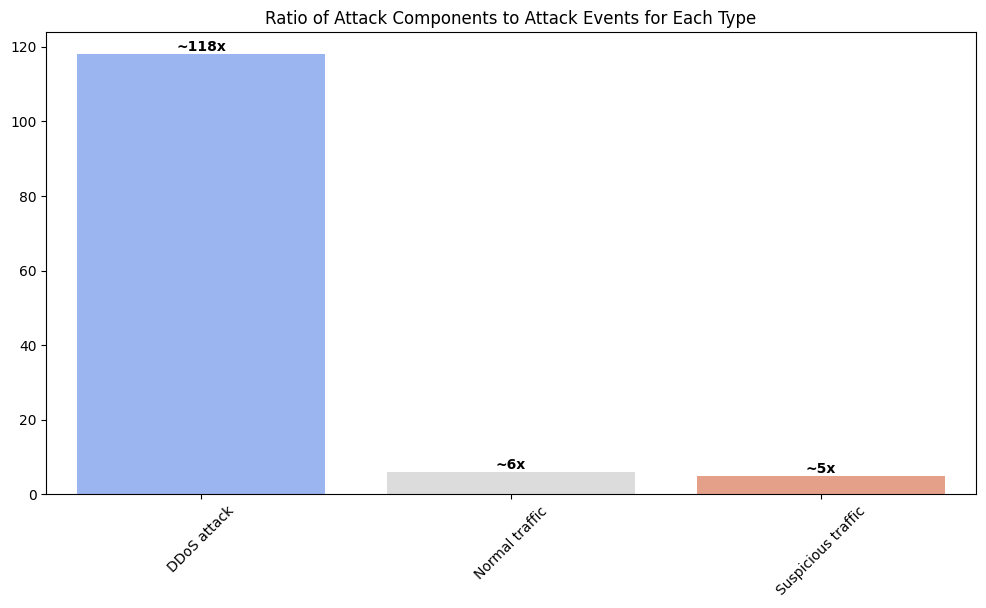

In [129]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=comparison_df, x=comparison_df.index, y='Ratio', palette='coolwarm')

for p in ax.patches:
    ax.annotate(
        f'~{p.get_height():.0f}x',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
    )

plt.xticks(rotation=45)
plt.title("Ratio of Attack Components to Attack Events for Each Type")
plt.xlabel("")
plt.ylabel("")
plt.show()

## Correlation

In [130]:
# Apply space stripping after the comma (i.e., split by ',' and strip spaces)
df_comp['Attack code'] = df_comp['Attack code'].apply(lambda x: [attack.strip() for attack in x.split(',')])

# Apply the MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
encoded_attacks = pd.DataFrame(mlb.fit_transform(df_comp['Attack code']), columns=mlb.classes_)

# Check the column names to verify if duplicates are gone
print(encoded_attacks.columns)

Index(['ACK Attack', 'CHARGEN', 'CLDAP', 'CoAP', 'DNS', 'Generic UDP',
       'High volume traffic', 'ICMP', 'IPv4 fragmentation', 'Memcached', 'NTP',
       'RDP', 'RPC', 'SNMP', 'SSDP', 'SYN Attack', 'Sentinel',
       'Suspicious traffic', 'TCP Anomaly', 'WSD'],
      dtype='object')


In [131]:


mlb = MultiLabelBinarizer()
encoded_attacks = pd.DataFrame(mlb.fit_transform(df_comp['Attack code']), columns=mlb.classes_)


In [132]:
encoded_attacks.columns

Index(['ACK Attack', 'CHARGEN', 'CLDAP', 'CoAP', 'DNS', 'Generic UDP',
       'High volume traffic', 'ICMP', 'IPv4 fragmentation', 'Memcached', 'NTP',
       'RDP', 'RPC', 'SNMP', 'SSDP', 'SYN Attack', 'Sentinel',
       'Suspicious traffic', 'TCP Anomaly', 'WSD'],
      dtype='object')

In [133]:
df_comp = pd.concat([df_comp, encoded_attacks], axis=1)

In [134]:
df_comp.drop(columns='Attack code', inplace=True)

In [135]:
relevant_columns = encoded_attacks.columns

In [136]:
relevant_columns

Index(['ACK Attack', 'CHARGEN', 'CLDAP', 'CoAP', 'DNS', 'Generic UDP',
       'High volume traffic', 'ICMP', 'IPv4 fragmentation', 'Memcached', 'NTP',
       'RDP', 'RPC', 'SNMP', 'SSDP', 'SYN Attack', 'Sentinel',
       'Suspicious traffic', 'TCP Anomaly', 'WSD'],
      dtype='object')

In [137]:
relevant_columns = relevant_columns.append(pd.Index(['Port number', 'Detect count', 'Packet speed', 'Data speed', 'Avg packet len', 'Source IP count']))

In [138]:
relevant_columns

Index(['ACK Attack', 'CHARGEN', 'CLDAP', 'CoAP', 'DNS', 'Generic UDP',
       'High volume traffic', 'ICMP', 'IPv4 fragmentation', 'Memcached', 'NTP',
       'RDP', 'RPC', 'SNMP', 'SSDP', 'SYN Attack', 'Sentinel',
       'Suspicious traffic', 'TCP Anomaly', 'WSD', 'Port number',
       'Detect count', 'Packet speed', 'Data speed', 'Avg packet len',
       'Source IP count'],
      dtype='object')

In [139]:
encoder = OneHotEncoder(sparse_output=False)
encoded_types = encoder.fit_transform(df_comp[['Type']])
encoded_types = pd.DataFrame(encoded_types, columns=encoder.get_feature_names_out(['Type']))
df_comp = pd.concat([df_comp, encoded_types], axis=1)
df_comp.drop(columns='Type', inplace=True)


In [146]:
df_comp

,Attack ID,Detect count,Victim IP,Port number,Packet speed,Data speed,Avg packet len,Source IP count,Time,ACK Attack,...,SNMP,SSDP,SYN Attack,Sentinel,Suspicious traffic,TCP Anomaly,WSD,Type_DDoS attack,Type_Normal traffic,Type_Suspicious traffic
0,1,1,IP_0001,4500,55600,73,1383,6,2022-08-08T18:09:36,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,2,1,IP_0002,4500,63500,90,1506,1,2022-08-08T18:37:28,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,3,1,IP_0003,1200,59700,79,1399,1,2022-08-08T18:41:25,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
3,3,2,IP_0003,1200,65700,86,1399,1,2022-08-08T18:41:26,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,4,1,IP_0002,4500,59500,85,1486,1,2022-08-08T18:47:49,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820087,702939,1,IP_67140,0,63700,91,1498,1,2023-08-25T18:04:21,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1820088,702940,1,IP_67500,443,59200,33,594,1,2023-08-25T18:04:42,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1820089,702940,2,IP_67500,443,60500,34,594,1,2023-08-25T18:05:16,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1820090,702940,3,IP_67500,0,55200,31,594,1,2023-08-25T18:05:45,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0


In [141]:
relevant_columns

Index(['ACK Attack', 'CHARGEN', 'CLDAP', 'CoAP', 'DNS', 'Generic UDP',
       'High volume traffic', 'ICMP', 'IPv4 fragmentation', 'Memcached', 'NTP',
       'RDP', 'RPC', 'SNMP', 'SSDP', 'SYN Attack', 'Sentinel',
       'Suspicious traffic', 'TCP Anomaly', 'WSD', 'Port number',
       'Detect count', 'Packet speed', 'Data speed', 'Avg packet len',
       'Source IP count'],
      dtype='object')

In [142]:
correlation_selected = df_comp[relevant_columns].corrwith(df_comp['Type_DDoS attack'])

In [143]:
correlation_selected

ACK Attack             0.003473
CHARGEN                0.031501
CLDAP                  0.180362
CoAP                   0.017795
DNS                    0.245297
Generic UDP            0.177643
High volume traffic   -0.357827
ICMP                  -0.018218
IPv4 fragmentation     0.116699
Memcached              0.039833
NTP                    0.180260
RDP                    0.060799
RPC                    0.022103
SNMP                   0.026566
SSDP                   0.036924
SYN Attack             0.114617
Sentinel               0.008328
Suspicious traffic     0.289501
TCP Anomaly            0.009976
WSD                    0.116009
Port number           -0.090075
Detect count           0.289232
Packet speed           0.197552
Data speed             0.161599
Avg packet len        -0.071124
Source IP count        0.228008
dtype: float64

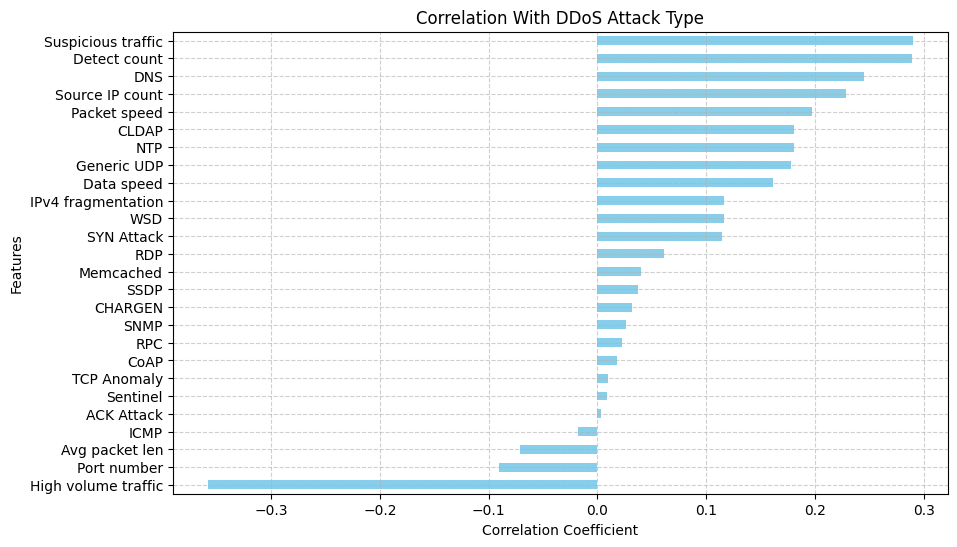

In [ ]:
correlation_data = pd.Series(correlation_selected, index=correlation_selected.index)

plt.figure(figsize=(10, 6))
correlation_data.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation With DDoS Attack Type')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

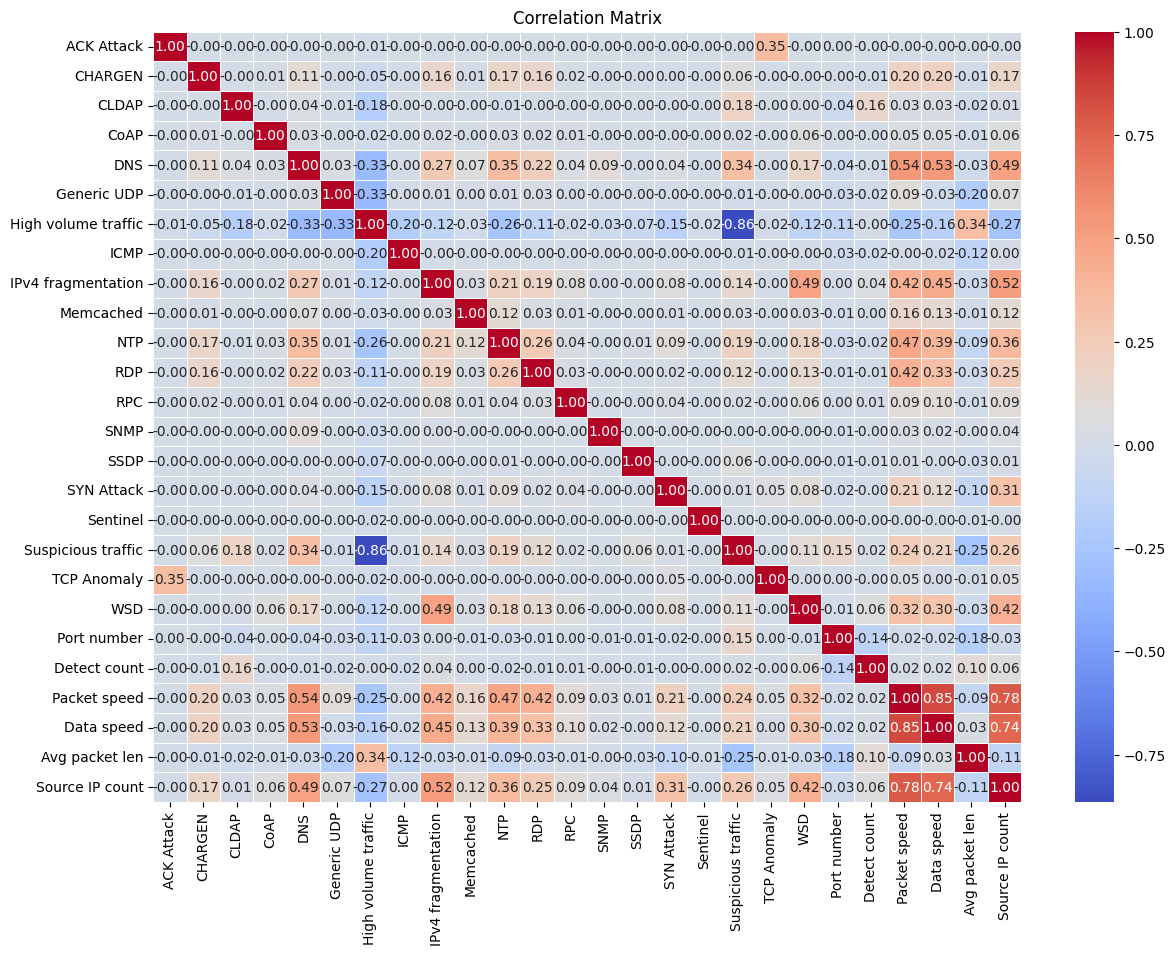

In [165]:
df_selected = df_comp[relevant_columns]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [166]:
df_comp

,Attack ID,Detect count,Victim IP,Port number,Packet speed,Data speed,Avg packet len,Source IP count,Time,ACK Attack,...,SNMP,SSDP,SYN Attack,Sentinel,Suspicious traffic,TCP Anomaly,WSD,Type_DDoS attack,Type_Normal traffic,Type_Suspicious traffic
0,1,1,IP_0001,4500,55600,73,1383,6,2022-08-08T18:09:36,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,2,1,IP_0002,4500,63500,90,1506,1,2022-08-08T18:37:28,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,3,1,IP_0003,1200,59700,79,1399,1,2022-08-08T18:41:25,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
3,3,2,IP_0003,1200,65700,86,1399,1,2022-08-08T18:41:26,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,4,1,IP_0002,4500,59500,85,1486,1,2022-08-08T18:47:49,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820087,702939,1,IP_67140,0,63700,91,1498,1,2023-08-25T18:04:21,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1820088,702940,1,IP_67500,443,59200,33,594,1,2023-08-25T18:04:42,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1820089,702940,2,IP_67500,443,60500,34,594,1,2023-08-25T18:05:16,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1820090,702940,3,IP_67500,0,55200,31,594,1,2023-08-25T18:05:45,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0


In [167]:
df_comp.to_csv('SCLDDoS2024_Combined.csv', index=False)